# Packages

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import initializers

In [2]:
import cv2
import matplotlib.pyplot as plt

In [3]:
import os
import zipfile

import shutil

# Visualization

**Parasitized Cells**

In [ ]:
img1 = cv2.imread('/content/drive/MyDrive/Cell-Img-Data/dataset/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png')

img2 = cv2.imread('/content/drive/MyDrive/Cell-Img-Data/dataset/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_166.png')
 
img3 = cv2.imread('/content/drive/MyDrive/Cell-Img-Data/dataset/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_171.png')

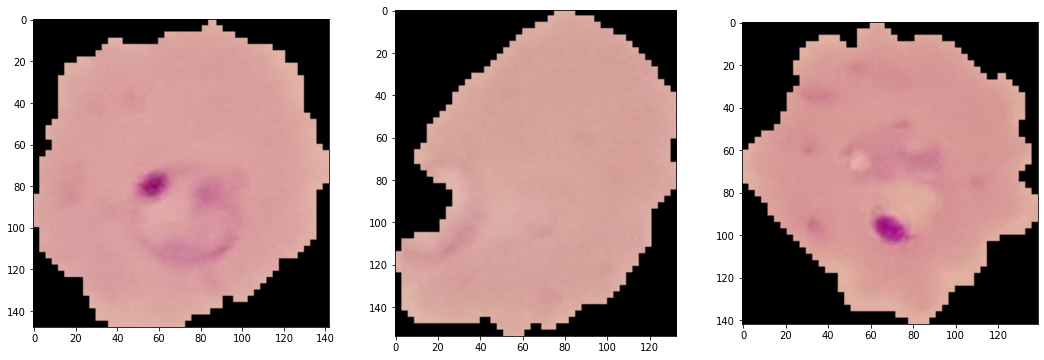

In [ ]:
fig = plt.figure(figsize=(18, 6))
axarr = fig.subplots(1, 3)

image = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
axarr[0].imshow(image)

image = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
axarr[1].imshow(image)

image = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
axarr[2].imshow(image)


plt.show()

In [ ]:
print(img1.shape)
print(img2.shape)
print(img3.shape)

(148, 142, 3)
(154, 133, 3)
(142, 139, 3)


In [ ]:
source = '/content/drive/MyDrive/Cell-Img-Data/dataset/Parasitized'
dir1_lst = os.listdir(source)
print(len(dir1_lst))

13780


**Uninfected Cells**

In [ ]:
img1 = cv2.imread('/content/drive/MyDrive/Cell-Img-Data/dataset/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_128.png')

img2 = cv2.imread('/content/drive/MyDrive/Cell-Img-Data/dataset/Uninfected/C100P61ThinF_IMG_20150918_145938_cell_83.png')

img3 = cv2.imread('/content/drive/MyDrive/Cell-Img-Data/dataset/Uninfected/C104P65ThinF_IMG_20150918_170850_cell_83.png')

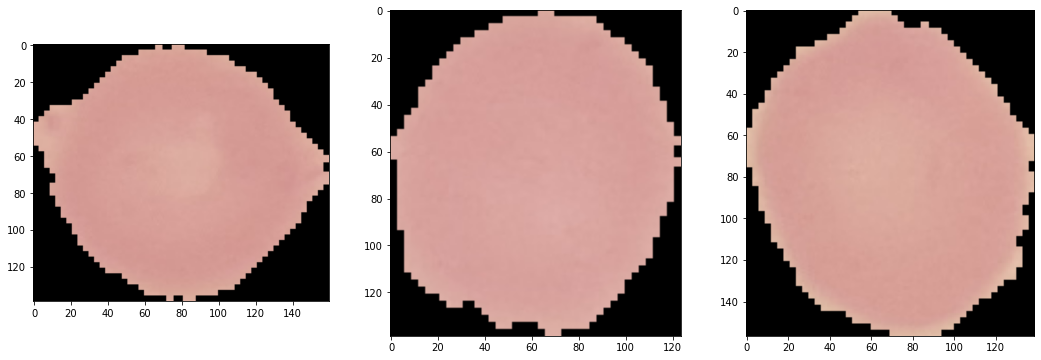

In [ ]:
fig = plt.figure(figsize=(18, 6))
axarr = fig.subplots(1, 3)

image = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
axarr[0].imshow(image)

image = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
axarr[1].imshow(image)

image = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
axarr[2].imshow(image)


plt.show()

In [ ]:
print(img1.shape)
print(img2.shape)
print(img3.shape)

(139, 160, 3)
(139, 124, 3)
(157, 139, 3)


In [ ]:
source = '/content/drive/MyDrive/Cell-Img-Data/dataset/Uninfected'
dir1_lst = os.listdir(source)
print(len(dir1_lst))

13780


**It is clear that shape of image is different in both the classes. So, image reshaping has to be done. I use ImageDataGenerator which resizes each image.**

**The total data(images) present in both the class are equal in count. Hence, balanced dataset.**

# Divide the dataset

**Using 75% for training, 15% for validation and 10% for evaluation.**

In [ ]:
os.mkdir("train")

In [ ]:
os.mkdir("valid")

In [ ]:
os.mkdir("eval")

In [ ]:
frame_dir = "/content/drive/MyDrive/Cell-Img-Data/dataset/Parasitized"
frame_dir_lst = os.listdir(frame_dir)
frame_dir_lst.sort()

output_dir1 = "/content/train/parasitized"

if not os.path.exists(output_dir1):
  os.mkdir(output_dir1)

for image_nm in frame_dir_lst[:10335]:
  img = cv2.imread(os.path.join(frame_dir,image_nm))
  cv2.imwrite(os.path.join(output_dir1,image_nm),img)


output_dir2 = "/content/valid/parasitized"

if not os.path.exists(output_dir2):
  os.mkdir(output_dir2)

for image_nm in frame_dir_lst[10335:12402]:
  img = cv2.imread(os.path.join(frame_dir,image_nm))
  cv2.imwrite(os.path.join(output_dir2,image_nm),img)



output_dir3 = "/content/eval/parasitized"

if not os.path.exists(output_dir3):
  os.mkdir(output_dir3)

for image_nm in frame_dir_lst[12402:]:
  img = cv2.imread(os.path.join(frame_dir,image_nm))
  cv2.imwrite(os.path.join(output_dir3,image_nm),img)

In [ ]:
source = '/content/train/parasitized'
dir1_lst = os.listdir(source)
print(len(dir1_lst)) #number of images used for training

10335


In [ ]:
source = '/content/valid/parasitized'
dir1_lst = os.listdir(source)
print(len(dir1_lst)) #number of images used for validation

2067


In [ ]:
source = '/content/eval/parasitized'
dir1_lst = os.listdir(source)
print(len(dir1_lst)) #number of images used for evaluation

1377


In [ ]:
frame_dir = "/content/drive/MyDrive/Cell-Img-Data/dataset/Uninfected"
frame_dir_lst = os.listdir(frame_dir)
frame_dir_lst.sort()

output_dir1 = "/content/train/uninfected"

if not os.path.exists(output_dir1):
  os.mkdir(output_dir1)

for image_nm in frame_dir_lst[:10335]:
  img = cv2.imread(os.path.join(frame_dir,image_nm))
  cv2.imwrite(os.path.join(output_dir1,image_nm),img)



output_dir2 = "/content/valid/uninfected"

if not os.path.exists(output_dir2):
  os.mkdir(output_dir2)

for image_nm in frame_dir_lst[10335:12402]:
  img = cv2.imread(os.path.join(frame_dir,image_nm))
  cv2.imwrite(os.path.join(output_dir2,image_nm),img)



output_dir3 = "/content/eval/uninfected"

if not os.path.exists(output_dir3):
  os.mkdir(output_dir3)

for image_nm in frame_dir_lst[12402:]:
  img = cv2.imread(os.path.join(frame_dir,image_nm))
  cv2.imwrite(os.path.join(output_dir3,image_nm),img)

In [ ]:
source = '/content/train/uninfected'
dir1_lst = os.listdir(source)
print(len(dir1_lst)) #number of images used for training

10335


In [ ]:
source = '/content/valid/uninfected'
dir1_lst = os.listdir(source)
print(len(dir1_lst)) #number of images used for training

2067


In [ ]:
source = '/content/eval/uninfected'
dir1_lst = os.listdir(source)
print(len(dir1_lst)) #number of images used for training

1377


In [ ]:
!zip -r -q train.zip "/content/train"

In [ ]:
!zip -r -q valid.zip "/content/valid"

In [ ]:
!zip -r -q eval.zip "/content/eval"

In [ ]:
source = '/content/'
destination = '/content/drive/MyDrive/Cell-Img-Data/'
f = 'train.zip'
src_path = os.path.join(source, f)
dst_path = os.path.join(destination, f)
shutil.move(src_path, dst_path)

'/content/drive/MyDrive/Cell-Img-Data/train.zip'

In [ ]:
source = '/content/'
destination = '/content/drive/MyDrive/Cell-Img-Data/'
f = 'valid.zip'
src_path = os.path.join(source, f)
dst_path = os.path.join(destination, f)
shutil.move(src_path, dst_path)

'/content/drive/MyDrive/Cell-Img-Data/valid.zip'

In [ ]:
source = '/content/'
destination = '/content/drive/MyDrive/Cell-Img-Data/'
f = 'eval.zip'
src_path = os.path.join(source, f)
dst_path = os.path.join(destination, f)
shutil.move(src_path, dst_path)

'/content/drive/MyDrive/Cell-Img-Data/eval.zip'

In [ ]:
train_data_gen = ImageDataGenerator(rescale=1/255)
validation_data_gen = ImageDataGenerator(rescale=1/255)

train_gen = train_data_gen.flow_from_directory(
    '/content/train',
    target_size = (150,150),
    batch_size = 128,
    class_mode = 'categorical'
)

val_gen = train_data_gen.flow_from_directory(
    '/content/valid',
    target_size = (150,150),
    batch_size = 64,
    class_mode = 'categorical'
)

Found 20670 images belonging to 2 classes.
Found 4134 images belonging to 2 classes.


# Model Architecture

In [ ]:
'''

Implement the following architecture sequentially:
a. Convolution layer with 9x9 kernel
b. Convolution layer with 6x6 kernel
c. Fully-connected layer with the appropriate number of neurons
d. Fully-connected layer with the appropriate number of neurons and a dropout
of 50% probability
e. Fully-connected layer with the appropriate number of neurons

'''

In [ ]:
initializer = tf.keras.initializers.GlorotUniform()

In [ ]:
model = Sequential()
model.add(layers.Conv2D(input_shape=(150, 150, 3), filters=64,kernel_size=(9,9), padding="same",activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
model.add(layers.Conv2D(64, (6, 6), activation='relu', padding='same', name='block1_conv1'))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu', kernel_initializer=initializer))
model.add(Dropout(0.5))
model.add(layers.Dense(128, activation='relu', kernel_initializer=initializer))

layer = tf.keras.layers.Dense(1, kernel_initializer=initializer, activation='sigmoid')#The Glorot uniform initializer, also called Xavier uniform initializer.
model.add(layer)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 64)      15616     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 64)       0         
 )                                                               
                                                                 
 block1_conv1 (Conv2D)       (None, 75, 75, 64)        147520    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 87616)             0         
                                                                 
 dense (Dense)               (None, 256)               2

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(loss = 'binary_crossentropy',
             optimizer = 'Adam',
             metrics = ['accuracy'])

In [ ]:
early_stopping=tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                patience=5)

In [ ]:
model_fit = model.fit(train_gen,
                      epochs = 20,
                      verbose = 1,
                      validation_data = val_gen,
                      callbacks = early_stopping)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()